In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_path = '../data/raw/creditcard.csv'
df_original = pd.read_csv(data_path)

In [5]:
print("Data size: ", df_original.shape)
print("Data types: ", df_original.dtypes)
print("Null counts: ", df_original.isnull().sum())

Data size:  (284807, 31)
Data types:  Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Null counts:  Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtyp

In [6]:
print(df_original.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

Class distribution Class
0    284315
1       492
Name: count, dtype: int64


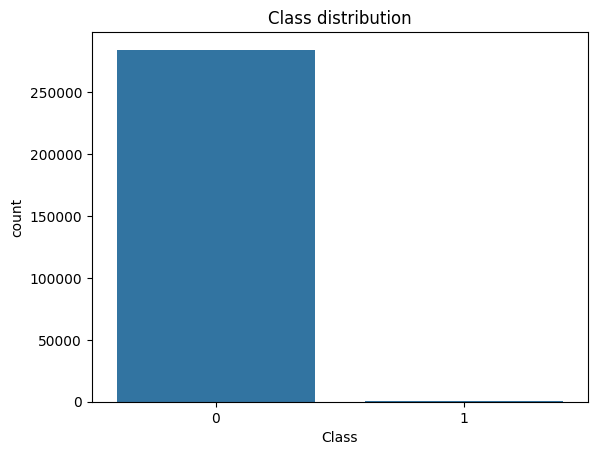

In [7]:
if 'Class' in df_original.columns:
    print("Class distribution", df_original['Class'].value_counts())
    sns.countplot(data=df_original, x='Class')
    plt.title("Class distribution")
    plt.show()
else:
    print("Целевая переменная 'Class' отсутствует в данных.")

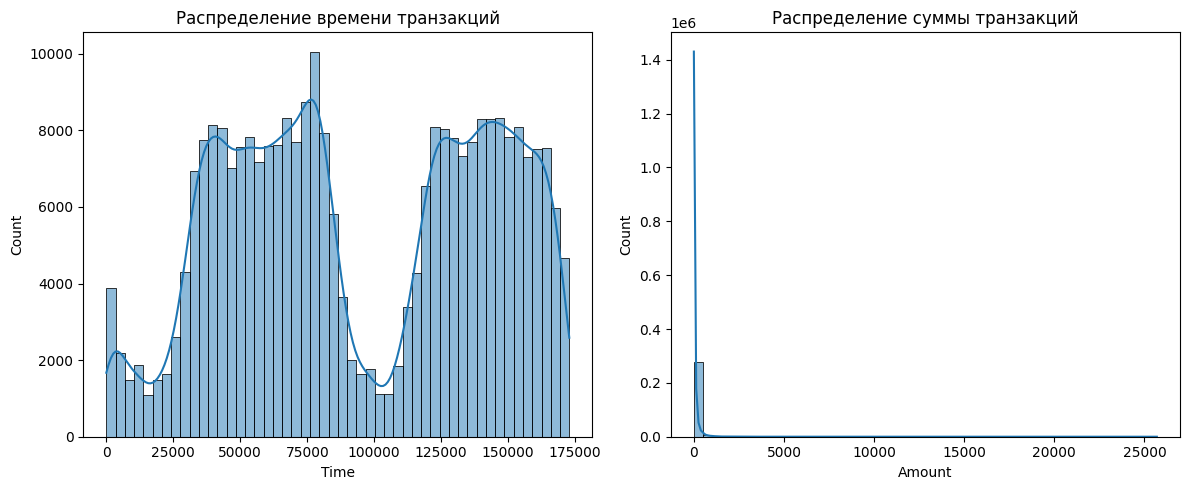

In [8]:
if 'Time' in df_original.columns and 'Amount' in df_original.columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(df_original['Time'], bins=50, kde=True, ax=ax[0])
    ax[0].set_title("Распределение времени транзакций")
    ax[0].set_xlabel("Time")

    sns.histplot(df_original['Amount'], bins=50, kde=True, ax=ax[1])
    ax[1].set_title("Распределение суммы транзакций")
    ax[1].set_xlabel("Amount")
 
    plt.tight_layout()
    plt.show()
else:
     print("Переменные 'Time' и/или 'Amount' отсутствуют в данных.")

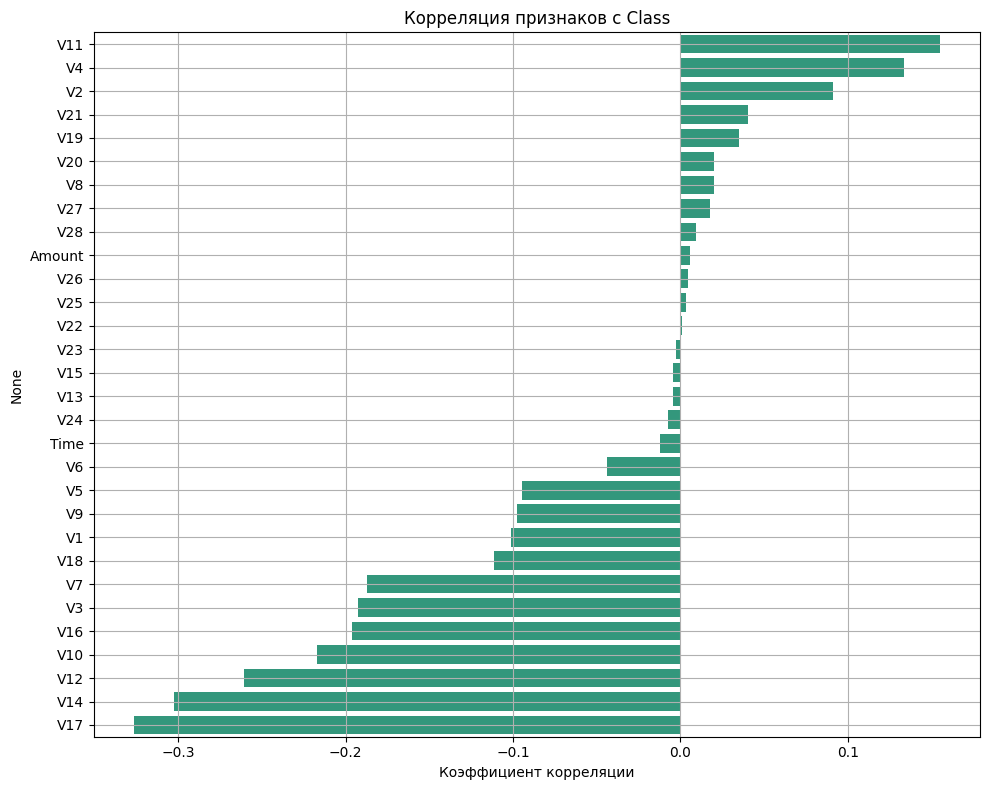

In [16]:
corr_matrix = df_original.corr()
target_corr = corr_matrix['Class'].drop('Class').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.values, y=target_corr.index, color=plt.cm.viridis(0.6))
plt.title('Корреляция признаков с Class')
plt.xlabel('Коэффициент корреляции')
plt.grid(True)
plt.tight_layout()
plt.show()

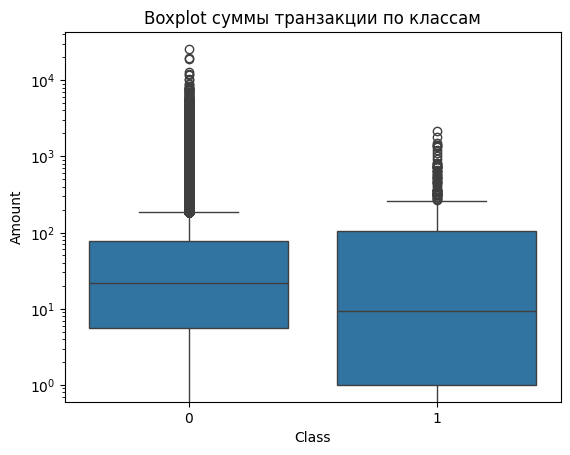

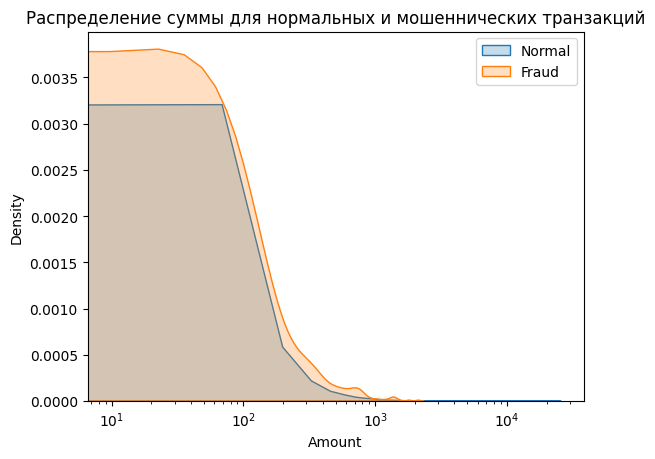

In [22]:
sns.boxplot(x='Class', y='Amount', data=df_original)
plt.title('Boxplot суммы транзакции по классам')
plt.yscale('log')
plt.show()

sns.kdeplot(data=df_original[df_original['Class'] == 0]['Amount'], label='Normal', fill=True)
sns.kdeplot(data=df_original[df_original['Class'] == 1]['Amount'], label='Fraud', fill=True)
plt.title('Распределение суммы для нормальных и мошеннических транзакций')
plt.xlabel('Amount')
plt.legend()
plt.xscale('log')
plt.show()

In [23]:
df = df_original.copy()

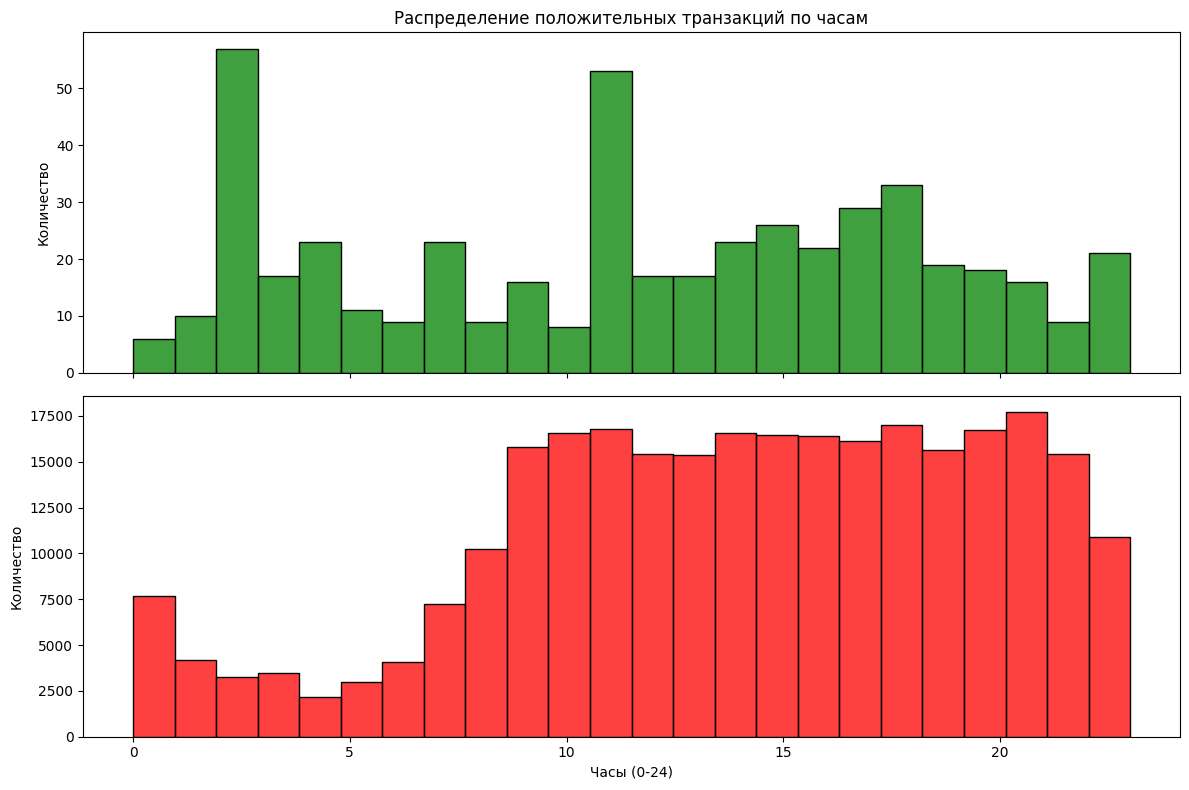

In [55]:
df['Hour'] = (df['Time'] // 3600) % 24

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

sns.histplot(data=df[df['Class'] == 1], x='Hour', bins=24, color='green', ax=ax1, kde=False)
ax1.set_title('Распределение мошеннических транзакций по часам')
ax1.set_ylabel('Количество')

sns.histplot(data=df[df['Class'] == 0], x='Hour', bins=24, color='red', ax=ax2, kde=False)
ax1.set_title('Распределение положительных транзакций по часам')
ax2.set_xlabel('Часы (0-24)')
ax2.set_ylabel('Количество')

plt.tight_layout()
plt.show()